In [17]:
import numpy as np

def compute_distances_with_loops(X_train, X_test):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))

    return dists


In [18]:
import numpy as np
import time

# Generate random training and test data
np.random.seed(0)
X_train = np.random.randn(1000, 50)
X_test = np.random.randn(500, 50)

# Traditional method
start_time = time.time()
dists_traditional = compute_distances_with_loops(X_train, X_test)
print("Traditional method took %.2f seconds" % (time.time() - start_time))

# Vectorized method
class DistanceCalculator:
    def __init__(self, X_train):
        self.X_train = X_train

    def compute_distances_no_loops(self, X):
        dists_squared = -2 * np.dot(X, self.X_train.T) + np.sum(self.X_train**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        dists = np.sqrt(dists_squared)
        return dists

distance_calculator = DistanceCalculator(X_train)

start_time = time.time()
dists_vectorized = distance_calculator.compute_distances_no_loops(X_test)
print("Vectorized method took %.2f seconds" % (time.time() - start_time))



Traditional method took 2.35 seconds
Vectorized method took 0.00 seconds


In [19]:
import numpy as np

# Assuming dists_traditional and dists_vectorized are already defined
# Example:
# dists_traditional = compute_distances_with_loops(X_train, X_test)
# dists_vectorized = distance_calculator.compute_distances_no_loops(X_test)

# a) Determine the dimensions of both distance matrices
dim_traditional = dists_traditional.shape
dim_vectorized = dists_vectorized.shape

print(f"Dimension of traditional distance matrix: {dim_traditional}")
print(f"Dimension of vectorized distance matrix: {dim_vectorized}")

# b) Calculate the sum of the entries of one matrix minus the other
difference_matrix = dists_traditional - dists_vectorized
sum_of_entries = np.sum(difference_matrix)

print(f"Sum of the entries of the difference matrix: {sum_of_entries}")
print(sum_of_entries / 500000)

Dimension of traditional distance matrix: (500, 1000)
Dimension of vectorized distance matrix: (500, 1000)
Sum of the entries of the difference matrix: -5.069722419648315e-12
-1.013944483929663e-17


In [20]:
#with all 3 methods: double for, no double for, cdist
import numpy as np
import time
from scipy.spatial.distance import cdist

# Sample data generation
np.random.seed(0)
X_train = np.random.randn(1000, 50)
X_test = np.random.randn(500, 50)

# Traditional method
def compute_distances_with_loops(X_train, X_test):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))

    return dists

start_time = time.time()
dists_traditional = compute_distances_with_loops(X_train, X_test)
print("Traditional method took %.2f seconds" % (time.time() - start_time))

# Vectorized method
class DistanceCalculator:
    def __init__(self, X_train):
        self.X_train = X_train

    def compute_distances_no_loops(self, X):
        dists_squared = -2 * np.dot(X, self.X_train.T) + np.sum(self.X_train**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        dists = np.sqrt(dists_squared)
        return dists

distance_calculator = DistanceCalculator(X_train)

start_time = time.time()
dists_vectorized = distance_calculator.compute_distances_no_loops(X_test)
print("Vectorized method took %.2f seconds" % (time.time() - start_time))

# Using scipy.spatial.distance.cdist
start_time = time.time()
dists_cdist = cdist(X_test, X_train, 'euclidean')
print("cdist method took %.2f seconds" % (time.time() - start_time))

# a) Determine the dimensions of all distance matrices
dim_traditional = dists_traditional.shape
dim_vectorized = dists_vectorized.shape
dim_cdist = dists_cdist.shape

print(f"Dimension of traditional distance matrix: {dim_traditional}")
print(f"Dimension of vectorized distance matrix: {dim_vectorized}")
print(f"Dimension of cdist distance matrix: {dim_cdist}")

# b) Calculate the sum of the entries of one matrix minus the other
difference_matrix_trad_vec = dists_traditional - dists_vectorized
sum_of_entries_trad_vec = np.sum(difference_matrix_trad_vec)

difference_matrix_trad_cdist = dists_traditional - dists_cdist
sum_of_entries_trad_cdist = np.sum(difference_matrix_trad_cdist)

difference_matrix_vec_cdist = dists_vectorized - dists_cdist
sum_of_entries_vec_cdist = np.sum(difference_matrix_vec_cdist)

print(f"Sum of the entries of the difference matrix (traditional - vectorized): {sum_of_entries_trad_vec}")
print(f"Sum of the entries of the difference matrix (traditional - cdist): {sum_of_entries_trad_cdist}")
print(f"Sum of the entries of the difference matrix (vectorized - cdist): {sum_of_entries_vec_cdist}")


Traditional method took 2.35 seconds
Vectorized method took 0.01 seconds
cdist method took 0.01 seconds
Dimension of traditional distance matrix: (500, 1000)
Dimension of vectorized distance matrix: (500, 1000)
Dimension of cdist distance matrix: (500, 1000)
Sum of the entries of the difference matrix (traditional - vectorized): -5.069722419648315e-12
Sum of the entries of the difference matrix (traditional - cdist): 7.807088309164101e-13
Sum of the entries of the difference matrix (vectorized - cdist): 5.850431250564725e-12


In [21]:
# better timing


import numpy as np
import timeit
from scipy.spatial.distance import cdist

# Sample data generation
np.random.seed(0)
X_train = np.random.randn(1000, 50)
X_test = np.random.randn(500, 50)

# Traditional method
def compute_distances_with_loops(X_train, X_test):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))

    return dists

# Vectorized method
class DistanceCalculator:
    def __init__(self, X_train):
        self.X_train = X_train

    def compute_distances_no_loops(self, X):
        dists_squared = -2 * np.dot(X, self.X_train.T) + np.sum(self.X_train**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        dists = np.sqrt(dists_squared)
        return dists

distance_calculator = DistanceCalculator(X_train)

# Define wrapper functions for timeit
def timeit_traditional():
    compute_distances_with_loops(X_train, X_test)

def timeit_vectorized():
    distance_calculator.compute_distances_no_loops(X_test)

def timeit_cdist():
    cdist(X_test, X_train, 'euclidean')

# Measure time with higher precision using timeit
time_traditional = timeit.timeit(timeit_traditional, number=10)
time_vectorized = timeit.timeit(timeit_vectorized, number=10)
time_cdist = timeit.timeit(timeit_cdist, number=10)

print(f"Traditional method took {time_traditional / 10:.6f} seconds per run")
print(f"Vectorized method took {time_vectorized / 10:.6f} seconds per run")
print(f"cdist method took {time_cdist / 10:.6f} seconds per run")

# Calculate the distances once for comparison
dists_traditional = compute_distances_with_loops(X_train, X_test)
dists_vectorized = distance_calculator.compute_distances_no_loops(X_test)
dists_cdist = cdist(X_test, X_train, 'euclidean')

# a) Determine the dimensions of all distance matrices
dim_traditional = dists_traditional.shape
dim_vectorized = dists_vectorized.shape
dim_cdist = dists_cdist.shape

print(f"Dimension of traditional distance matrix: {dim_traditional}")
print(f"Dimension of vectorized distance matrix: {dim_vectorized}")
print(f"Dimension of cdist distance matrix: {dim_cdist}")

# b) Calculate the sum of the entries of one matrix minus the other
difference_matrix_trad_vec = dists_traditional - dists_vectorized
sum_of_entries_trad_vec = np.sum(difference_matrix_trad_vec)

difference_matrix_trad_cdist = dists_traditional - dists_cdist
sum_of_entries_trad_cdist = np.sum(difference_matrix_trad_cdist)

difference_matrix_vec_cdist = dists_vectorized - dists_cdist
sum_of_entries_vec_cdist = np.sum(difference_matrix_vec_cdist)

print(f"Sum of the entries of the difference matrix (traditional - vectorized): {sum_of_entries_trad_vec}")
print(f"Sum of the entries of the difference matrix (traditional - cdist): {sum_of_entries_trad_cdist}")
print(f"Sum of the entries of the difference matrix (vectorized - cdist): {sum_of_entries_vec_cdist}")


Traditional method took 2.348660 seconds per run
Vectorized method took 0.005099 seconds per run
cdist method took 0.009006 seconds per run
Dimension of traditional distance matrix: (500, 1000)
Dimension of vectorized distance matrix: (500, 1000)
Dimension of cdist distance matrix: (500, 1000)
Sum of the entries of the difference matrix (traditional - vectorized): -5.069722419648315e-12
Sum of the entries of the difference matrix (traditional - cdist): 7.807088309164101e-13
Sum of the entries of the difference matrix (vectorized - cdist): 5.850431250564725e-12


checkpoint4


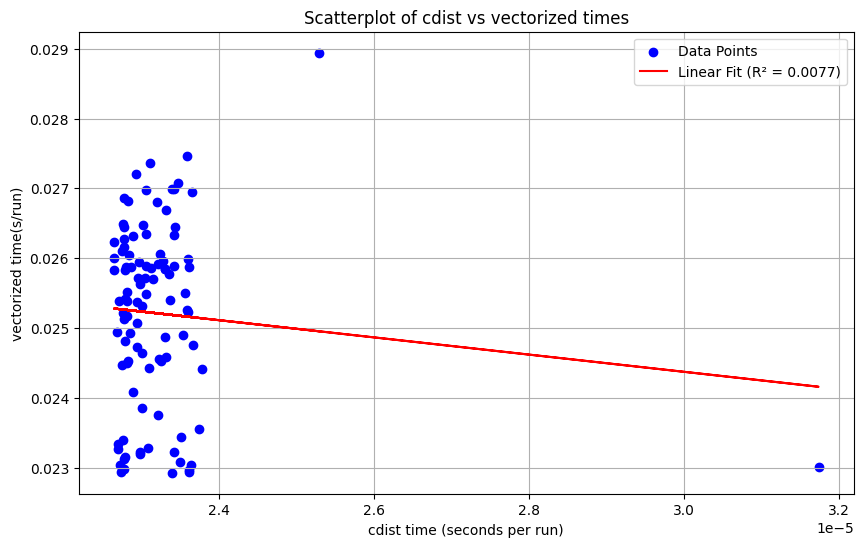

Dimension of traditional distance matrix: (50, 100)
Dimension of vectorized distance matrix: (50, 100)
Dimension of cdist distance matrix: (50, 100)
Sum of the entries of the difference matrix (traditional - vectorized): -4.8183679268731794e-14
Sum of the entries of the difference matrix (traditional - cdist): 0.0
Sum of the entries of the difference matrix (vectorized - cdist): 4.8183679268731794e-14


In [5]:
import numpy as np
import timeit
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Sample data generation
np.random.seed(0)
X_train = np.random.randn(100, 5)
X_test = np.random.randn(50, 5)

# Traditional method
def compute_distances_with_loops(X_train, X_test):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))

    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))

    return dists

# Vectorized method
class DistanceCalculator:
    def __init__(self, X_train):
        self.X_train = X_train

    def compute_distances_no_loops(self, X):
        dists_squared = -2 * np.dot(X, self.X_train.T) + np.sum(self.X_train**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        dists = np.sqrt(dists_squared)
        return dists

distance_calculator = DistanceCalculator(X_train)

# Define wrapper functions for timeit
def timeit_traditional():
    compute_distances_with_loops(X_train, X_test)

def timeit_vectorized():
    distance_calculator.compute_distances_no_loops(X_test)

def timeit_cdist():
    cdist(X_test, X_train, 'euclidean')

# Run measurements 100 times
num_trials = 100
times_traditional = []
times_vectorized = []
times_cdist = []

for _ in range(num_trials):
    time_traditional = timeit.timeit(timeit_traditional, number=10)
    time_vectorized = timeit.timeit(timeit_vectorized, number=10)
    time_cdist = timeit.timeit(timeit_cdist, number=10)

    times_traditional.append(time_traditional / 10)
    times_vectorized.append(time_vectorized / 10)
    times_cdist.append(time_cdist / 10)

# Plot scatterplot
# Scatter plot with linear fit and R² value
x = np.array(times_cdist).reshape(-1, 1)
y = np.array(times_squareform).reshape(-1, 1)

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
r2 = r2_score(y, y_pred)
print("checkpoint4")
plt.figure(figsize=(10, 6))
plt.scatter(times_cdist, times_squareform, label='Data Points', color='blue')
plt.plot(x, y_pred, label=f'Linear Fit (R² = {r2:.4f})', color='red')
plt.xlabel('cdist time (seconds per run)')
plt.ylabel('vectorized time(s/run)')
plt.title('Scatterplot of cdist vs vectorized times')
plt.legend()
plt.grid(True)
plt.show()


# Calculate the distances once for comparison
dists_traditional = compute_distances_with_loops(X_train, X_test)
dists_vectorized = distance_calculator.compute_distances_no_loops(X_test)
dists_cdist = cdist(X_test, X_train, 'euclidean')

# Determine the dimensions of all distance matrices
dim_traditional = dists_traditional.shape
dim_vectorized = dists_vectorized.shape
dim_cdist = dists_cdist.shape

print(f"Dimension of traditional distance matrix: {dim_traditional}")
print(f"Dimension of vectorized distance matrix: {dim_vectorized}")
print(f"Dimension of cdist distance matrix: {dim_cdist}")

# Calculate the sum of the entries of one matrix minus the other
difference_matrix_trad_vec = dists_traditional - dists_vectorized
sum_of_entries_trad_vec = np.sum(difference_matrix_trad_vec)

difference_matrix_trad_cdist = dists_traditional - dists_cdist
sum_of_entries_trad_cdist = np.sum(difference_matrix_trad_cdist)

difference_matrix_vec_cdist = dists_vectorized - dists_cdist
sum_of_entries_vec_cdist = np.sum(difference_matrix_vec_cdist)

print(f"Sum of the entries of the difference matrix (traditional - vectorized): {sum_of_entries_trad_vec}")
print(f"Sum of the entries of the difference matrix (traditional - cdist): {sum_of_entries_trad_cdist}")
print(f"Sum of the entries of the difference matrix (vectorized - cdist): {sum_of_entries_vec_cdist}")


## Squareform Pdist comparison

checkpoint1
Checkpoint2
checkpoint3
Sum of the distance entries (cdist): 4953778.335119166
Sum of the distance entries (squareform): 22282264.843806252
checkpoint4


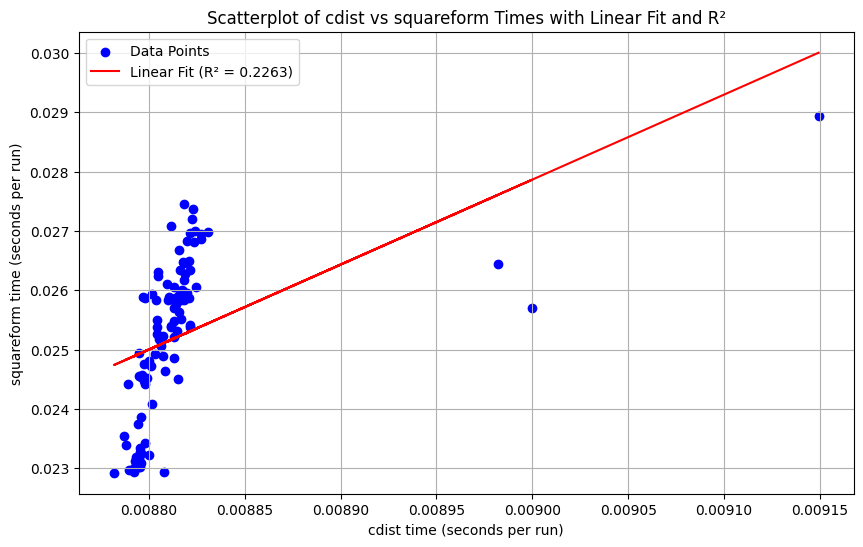

In [3]:
import numpy as np
import timeit
from scipy.spatial.distance import cdist, pdist, squareform
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print("checkpoint1")
# Sample data generation
np.random.seed(0)
X_train = np.random.randn(1000, 50)
X_test = np.random.randn(500, 50)

# Define wrapper functions for timeit
def timeit_cdist():
    cdist(X_test, X_train, 'euclidean')

def timeit_squareform():
    # Compute pairwise distances for the concatenated dataset
    combined_data = np.vstack((X_train, X_test))
    pdist_matrix = pdist(combined_data, 'euclidean')
    squareform(pdist_matrix)

# Run measurements 100 times
num_trials = 100
times_cdist = []
times_squareform = []
print("Checkpoint2")
for _ in range(num_trials):
    time_cdist = timeit.timeit(timeit_cdist, number=10)
    time_squareform = timeit.timeit(timeit_squareform, number=10)

    times_cdist.append(time_cdist / 10)
    times_squareform.append(time_squareform / 10)

# Calculate the distances once for comparison
dists_cdist = cdist(X_test, X_train, 'euclidean')
combined_data = np.vstack((X_train, X_test))
pdist_matrix = pdist(combined_data, 'euclidean')
dists_squareform = squareform(pdist_matrix)
print("checkpoint3")
# Compute the sum of distance entries for both methods
sum_dists_cdist = np.sum(dists_cdist)
sum_dists_squareform = np.sum(dists_squareform)

print(f"Sum of the distance entries (cdist): {sum_dists_cdist}")
print(f"Sum of the distance entries (squareform): {sum_dists_squareform}")

# Scatter plot with linear fit and R² value
x = np.array(times_cdist).reshape(-1, 1)
y = np.array(times_squareform).reshape(-1, 1)

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)
r2 = r2_score(y, y_pred)
print("checkpoint4")
plt.figure(figsize=(10, 6))
plt.scatter(times_cdist, times_squareform, label='Data Points', color='blue')
plt.plot(x, y_pred, label=f'Linear Fit (R² = {r2:.4f})', color='red')
plt.xlabel('cdist time (seconds per run)')
plt.ylabel('squareform time (seconds per run)')
plt.title('Scatterplot of cdist vs squareform Times with Linear Fit and R²')
plt.legend()
plt.grid(True)
plt.show()
